## 1 Design an exam exercise

i. Describe an algorithm for generating points uniformly in d-dimensional ball of randius r.  
ii. Describe an algorithm for generating random points uniformly in d-dimensional cylinder of radius r and height h.  
iii. Write pseudocode for the algorithm you suggested in **ii**.

## 2

In [158]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [159]:
def get_kernel_matrix(X, kernel_func):
    N = X.shape[0]
    K = np.zeros((N,N))
    
    for i in range(N):
        for j in range(i, N):
            K[i,j] = K[j,i] = kernel_func(X[i], X[j])
    
    return K

def perceptron_kernel(X, l, K):
    N = X.shape[0]
    
    c = np.zeros(N)
    
    history = []
    perfect = False
    while not perfect:
        perfect = True
        for i in range(N):
            if np.dot(K[i], c) * l[i] <= 0:
                c[i] += l[i]
                prediction = np.where(np.dot(K, c) > 0, 1, -1)
                history.append(prediction)
                perfect = False
    
    print(f'Found solution after {len(history)} updates')
    # return history of class predictions
    return history

def plot_predictions(X, label, pred, ax):
    tp = (label > 0) & (pred > 0)
    tn = (label < 0) & (pred < 0)
    fp = (label < 0) & (pred > 0)
    fn = (label > 0) & (pred < 0)
    
    ax.scatter(X[tp,0], X[tp, 1], alpha=0.6, marker='o', c='cornflowerblue', label='TP') #using epic colornames
    ax.scatter(X[tn,0], X[tn, 1], alpha=0.6, marker='o', c='mediumseagreen', label='TN')
    ax.scatter(X[fp,0], X[fp, 1], alpha=0.6, marker='x', c='rebeccapurple', label='FP')
    ax.scatter(X[fn,0], X[fn, 1], alpha=0.6, marker='x', c='firebrick', label='FN')
    ax.legend()

    
def plot_prediction_history(X, label, history):
    fig, ax = plt.subplots(2, 2, figsize=(16,16))
    ax = ax.flat
    plot_predictions(X, l, history[0], ax[0])
    plot_predictions(X, l, history[1], ax[1])
    plot_predictions(X, l, history[-2], ax[2])
    plot_predictions(X, l, history[-1], ax[3])


    ax[0].set_title('after 1 update')
    ax[1].set_title('after 2 updates')
    ax[2].set_title(f'after {len(history)-1} updates')
    ax[3].set_title(f'after {len(history)} updates');

### 2a 
Running perceptron algorithm for linearly separable set of points with kernel $k(x,y) = <x,y>$  
It took 15 updates to find a solution, it is much less than theoretical bound $r^2 * ||w*||^2$ = 19272


Theoretical upper bound for number of updates: 9658.598052250189
Found solution after 5 updates


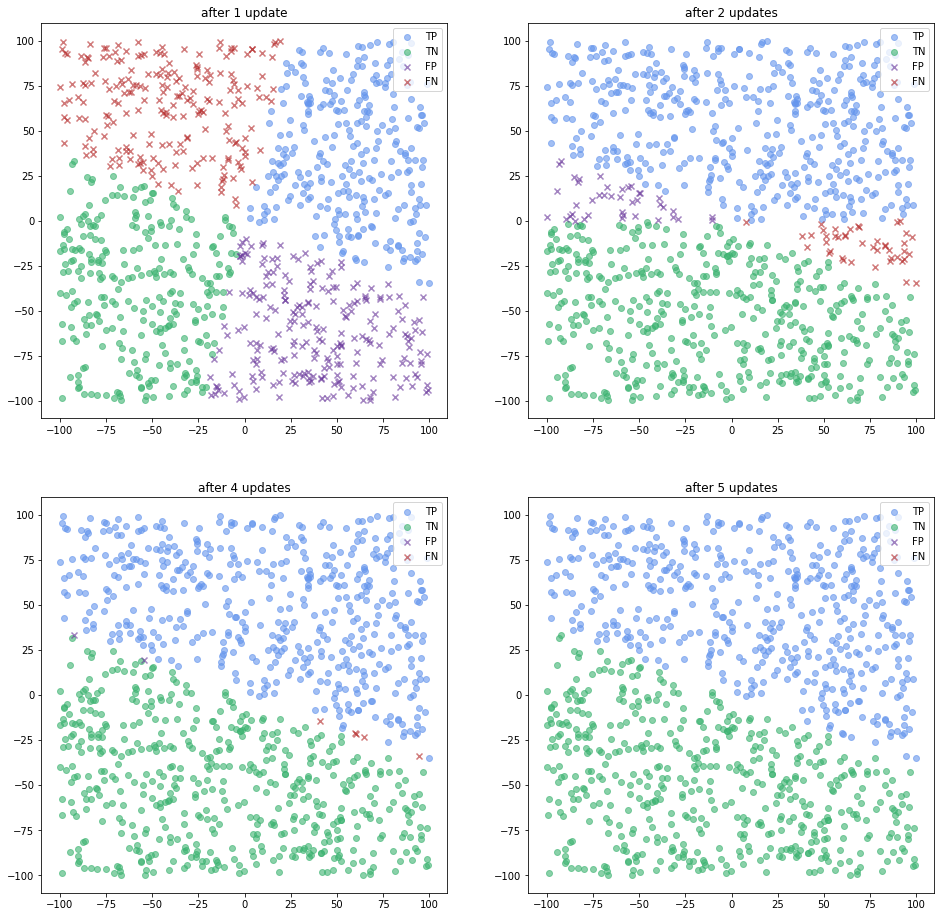

In [164]:
N = 1000

w = np.random.random(2)
X = np.zeros((N, 2))
l = np.zeros(N)
for i in range(N):
    x = np.random.uniform(-100, 100, 2)
    while abs(np.dot(w, x)) < 1:
        x = np.random.uniform(-100, 100, 2)
    X[i] = x
    l[i] = np.dot(w, x)

ubound = max(np.linalg.norm(X, axis=1)) ** 2 * np.linalg.norm(w) ** 2
print(f'Theoretical upper bound for number of updates: {ubound}')    

K = get_kernel_matrix(X, lambda x,y: np.dot(x,y))
history = perceptron_kernel(X, l, K)
plot_prediction_history(X, l, history)

### 2b
Running perceptron algorithm for linearly inseparable set of points with Gaussian kernel $k(x,y) = e^{-||x-y||^2}$

We observe that after 1 update all points are assigned to the same class +1. It is because after 1 update there is only one "Gaussian hat" which determines the class label of all points.

Found solution after 22 updates


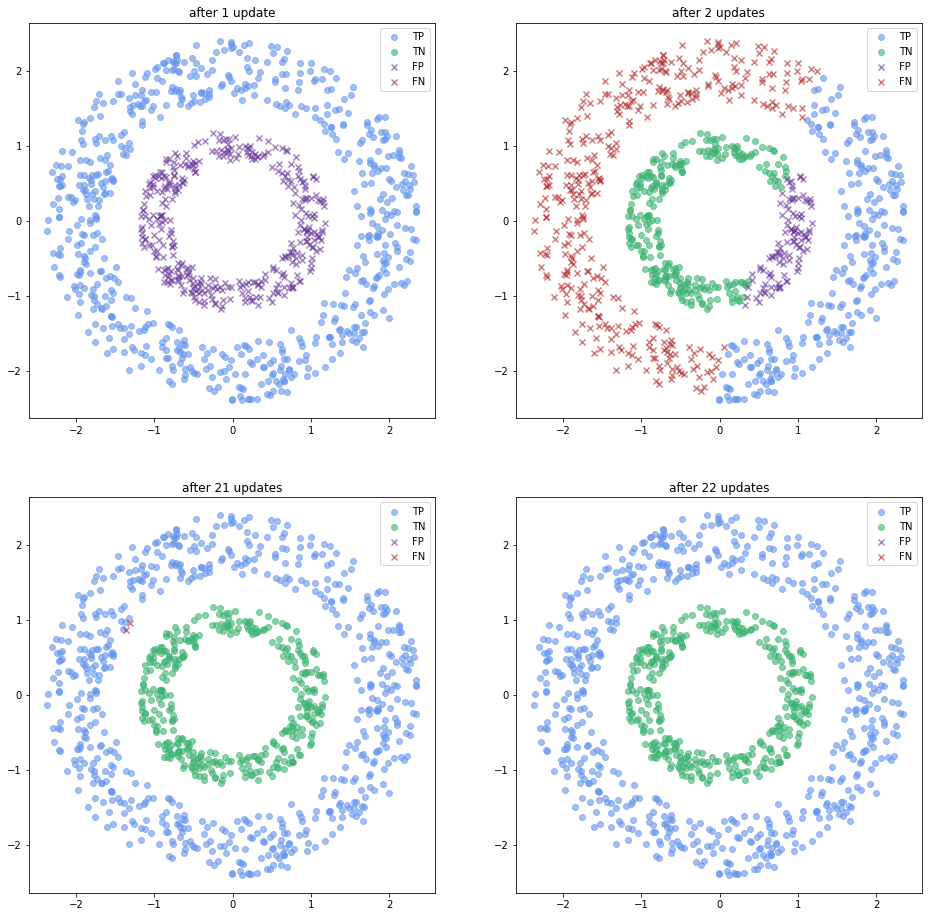

In [150]:
N = 1000

X = np.zeros((N, 2))
l = np.zeros(N)
for i in range(N):
    if np.random.random() < 1/3:
        r = np.random.uniform(0.8, 1.2)
        l[i] = -1
    else:
        r = np.random.uniform(1.6, 2.4)
        l[i] = 1
    
    phi = np.random.uniform(0, 2*np.pi)
    X[i] = [r * np.cos(phi), r * np.sin(phi)]
    
Xp1 = X + 1

K = get_kernel_matrix(X, lambda x,y: np.exp(-np.linalg.norm(x - y)))
history = perceptron_kernel(X, l, K)
plot_prediction_history(X, l, history)

### 2c
Running perceptron algorithm for linearly inseparable set of points with Gaussian kernel $k(x,y) = e^{-||x-y||^2}$

The points are the same as in the previous task but were translated by vector (1,1).   
The algorithm makes exactly the same update steps to find the solution.

Found solution after 22 updates


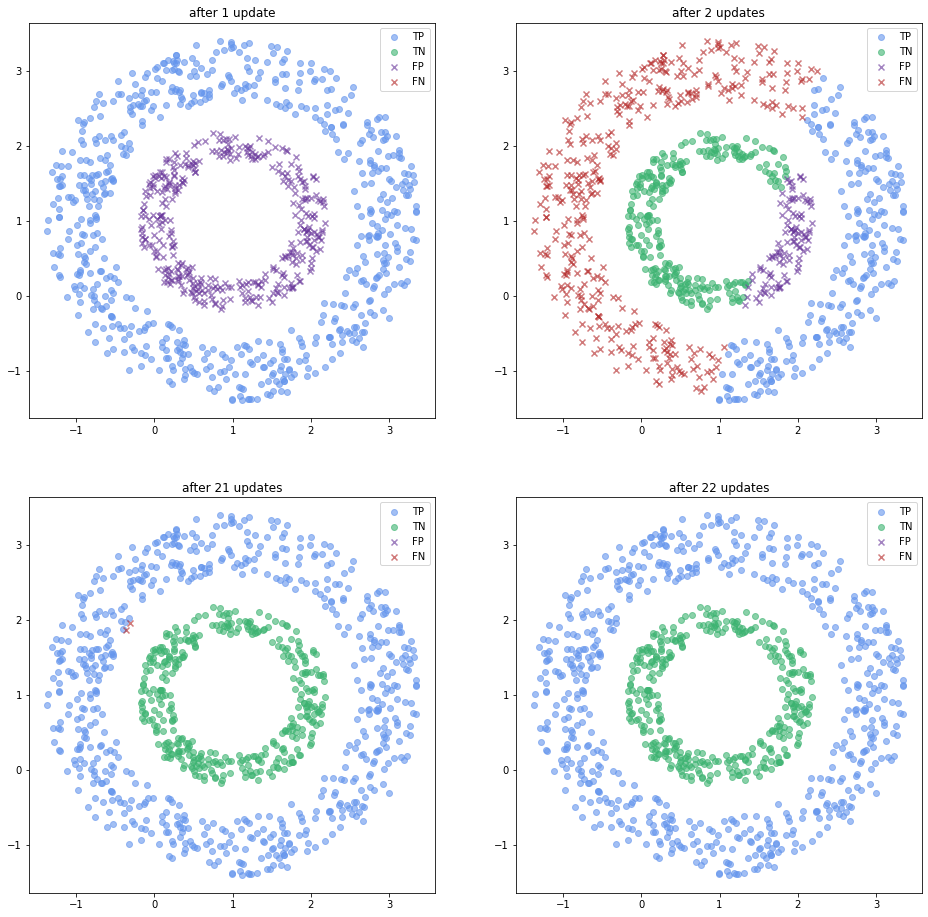

In [151]:
X = Xp1

K = get_kernel_matrix(X, lambda x,y: np.exp(-np.linalg.norm(x - y)))
history = perceptron_kernel(X, l, K)
plot_prediction_history(X, l, history)